In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print("train_images shape", train_images.shape)
print("train_labels shape", train_labels.shape)

train_images shape (60000, 28, 28)
train_labels shape (60000,)


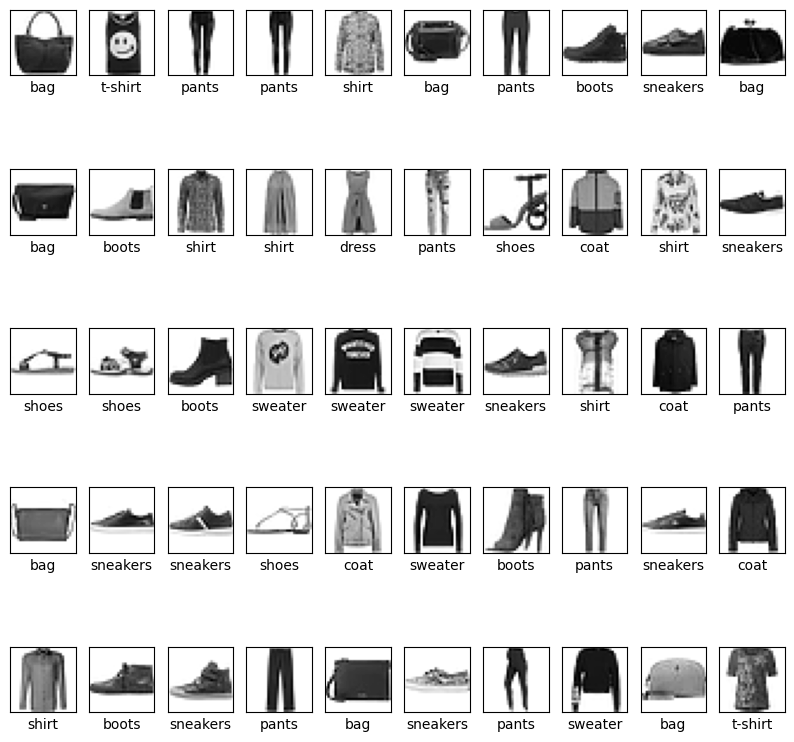

In [4]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']
plt.figure(figsize=(10, 10))

for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

plt.show()

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
print("Number of train data - " + str(len(train_images)))
print("Number of test data - " + str(len(test_images)))

Number of train data - 60000
Number of test data - 10000


In [6]:
(train_images, train_images_valid) = train_images[5000:], train_images[:5000]
(train_labels, train_labels_valid) = train_labels[5000:], train_labels[:5000]
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images_valid = train_images_valid.reshape(train_images_valid.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
train_labels_valid = tf.keras.utils.to_categorical(train_labels_valid, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)
print(train_images.shape[0], 'train set')
print(train_images_valid.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [7]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)         

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


1719/1719 [==============================] - 28s 15ms/step - loss: 0.4879 - accuracy: 0.8218 - val_loss: 0.3626 - val_accuracy: 0.8646
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3399 - accuracy: 0.8747 - val_loss: 0.2956 - val_accuracy: 0.8903
Epoch 3/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2956 - accuracy: 0.8912 - val_loss: 0.2706 - val_accuracy: 0.9011
Epoch 4/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2728 - accuracy: 0.8993 - val_loss: 0.2624 - val_accuracy: 0.9048
Epoch 5/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2551 - accuracy: 0.9050 - val_loss: 0.2374 - val_accuracy: 0.9127
Epoch 6/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2358 - accuracy: 0.9119 - val_loss: 0.2305 - val_accuracy: 0.9150
Epoch 7/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2263 - accuracy: 0.9153 - val_loss: 0.255

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2245 - accuracy: 0.9191
Test accuracy: 0.9190999865531921


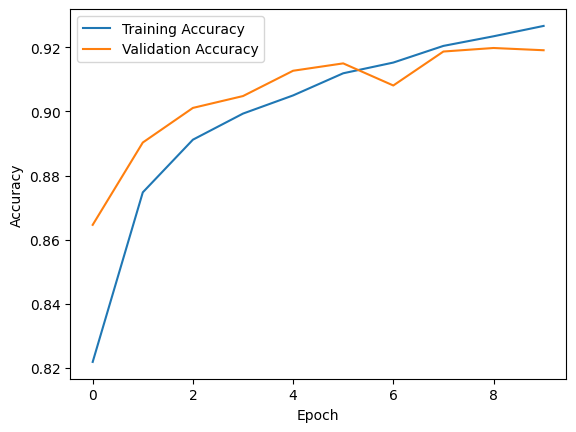

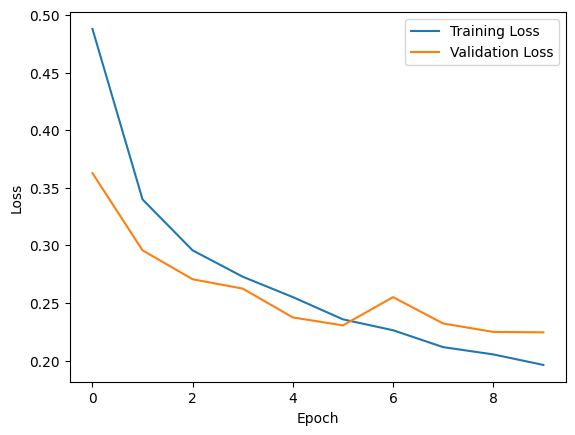

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('\n', 'Test accuracy:', round(score[1], 3))


 Test accuracy: 0.919


313/313 [==============================] - 1s 3ms/step


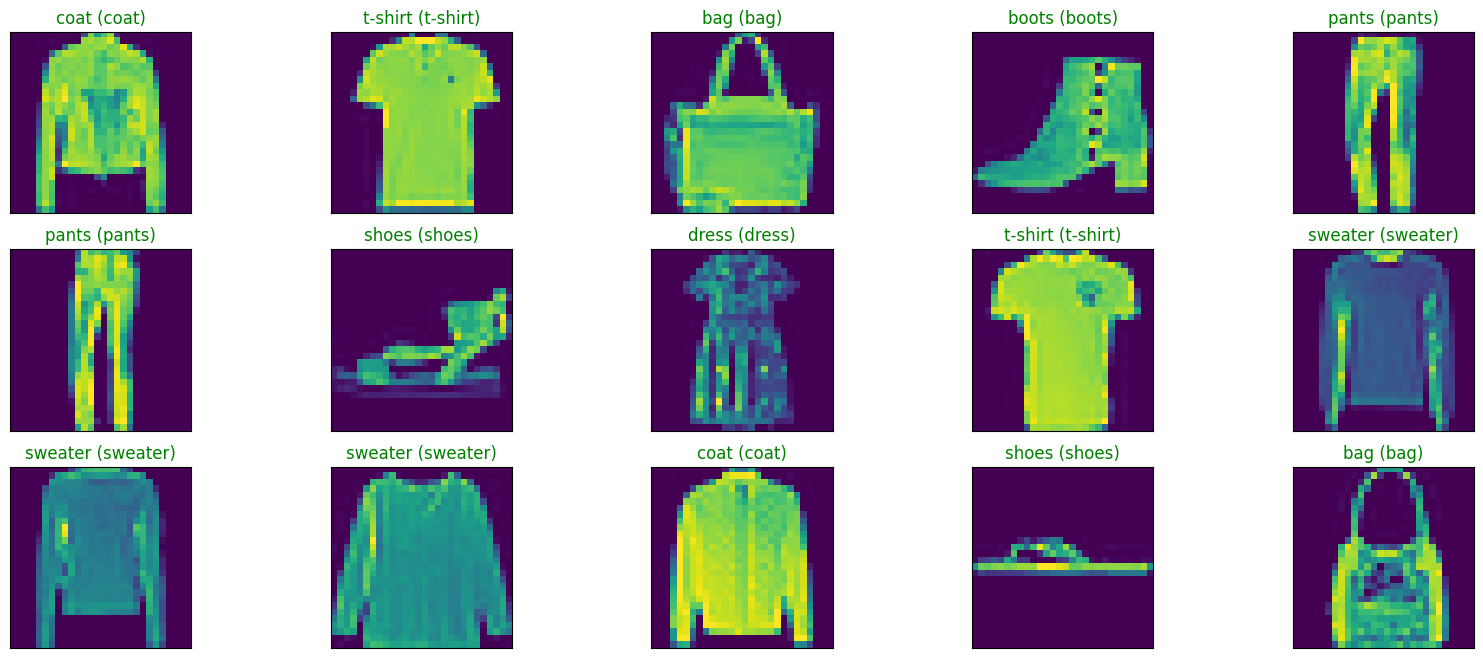

In [12]:
images_hat = model.predict(test_images)
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(images_hat[index])
    true_index = np.argmax(test_labels[index])
    ax.set_title("{} ({})".format(classes[predict_index], classes[true_index]), color=("green" if predict_index == true_index else "red"))

Після оцінки обох моделей за метрикою точності, отримані результати:
- модель з 9дз, що використовує три згорткових шари без передобробки даних (точність: 0.912).
- модель з 10дз 1, яка змінює розмір зображень та використовує додаткові згорткові шари (точність: 0.919).
Обидві моделі показали досить схожу точність, але друга модель, яка використовує змінені розміри та додаткові згорткові шари, 
трохи випереджає за точністю першу модель.
Загалом, обидві моделі виявилися досить ефективними для класифікації Fashion MNIST, 
але другий підхід з додатковою обробкою зображень та додатковими шарами здатний трохи покращити точність моделі.